In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Library for Logistics Regression, SVM, Gradient Boosting 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Load Iris Data

df = pd.read_excel('iris.xlsx')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Statistical Values about the Iris dataset

df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Basic info - Not Null count, Data type

df.shape

(150, 5)

In [5]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [6]:
# Check for null values

df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

## Exploratory Data Analysis

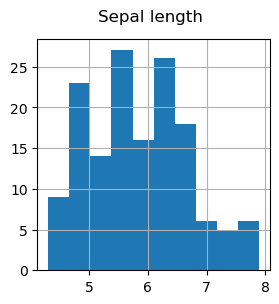

In [7]:
# EDA - Histogram
desc = "Sepal length"
df['sepal.length'].hist(figsize=(3,3))
plt.suptitle(desc)
plt.show()

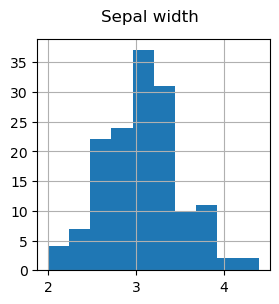

In [8]:
desc = "Sepal width"
df['sepal.width'].hist(figsize=(3,3))
plt.suptitle(desc)
plt.show()

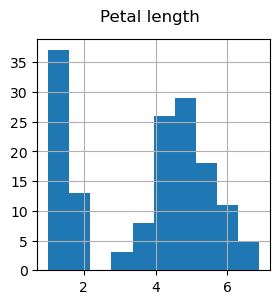

In [9]:
desc = "Petal length"
df['petal.length'].hist(figsize=(3,3))
plt.suptitle(desc)
plt.show()

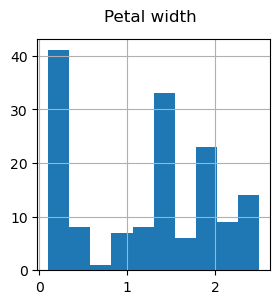

In [10]:
desc = "Petal width"
df['petal.width'].hist(figsize=(3,3))
plt.suptitle(desc)
plt.show()

## Histogram Visualization - Analysis
Histograms are generated for various attributes such as sepal length, sepal width, petal length, petal width. Most graphs form 
bell-shaped curves that is measures are normally distributed. As a result, the training would be rather simple.

In [11]:
# EDA - Scatterplot

colors = ['red', 'orange', 'green']
variants = ['Virginica','Versicolor','Setosa']

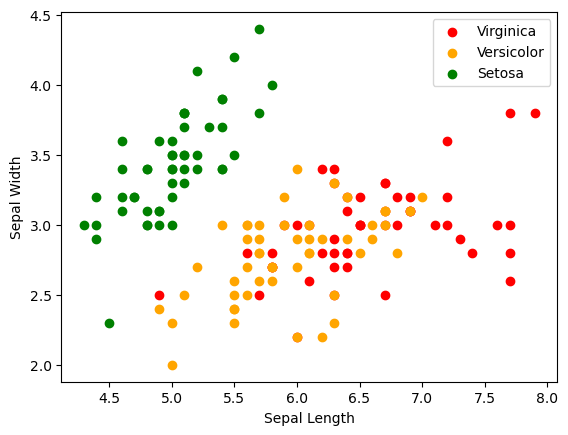

In [12]:
for i in range(3):
    x = df[df['variety']==variants[i]]
    plt.scatter(x['sepal.length'],x['sepal.width'], c = colors[i], label=variants[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

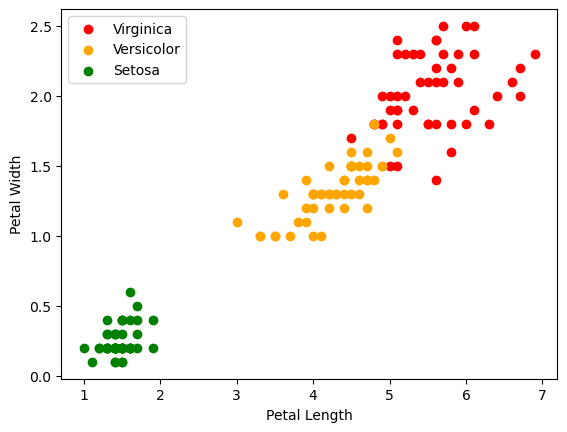

In [13]:
for i in range(3):
    x = df[df['variety']==variants[i]]
    plt.scatter(x['petal.length'],x['petal.width'], c = colors[i], label=variants[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

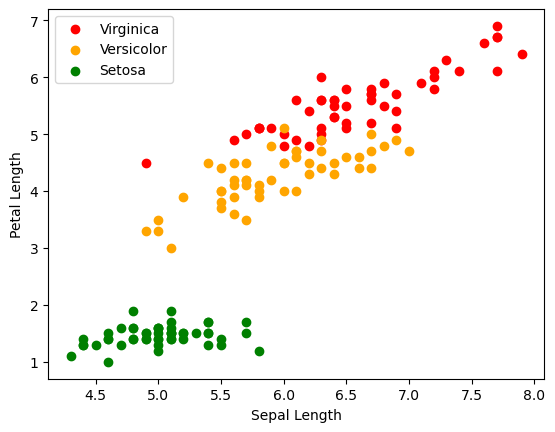

In [14]:
for i in range(3):
    x = df[df['variety']==variants[i]]
    plt.scatter(x['sepal.length'],x['petal.length'], c = colors[i], label=variants[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

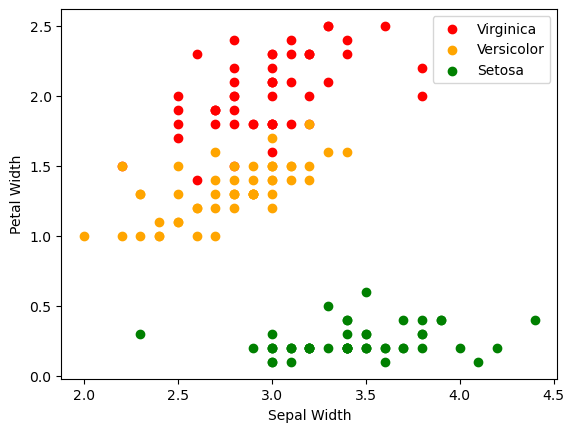

In [15]:
for i in range(3):
    x = df[df['variety']==variants[i]]
    plt.scatter(x['sepal.width'],x['petal.width'], c = colors[i], label=variants[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

## Scatter plot Visualization - Analysis

It is evident from the scatter plots that there are three classes: Setosa, Versicolor, and Verginica. Versicolor and Verginica 
classes are overlapped among those, however Setosa class is isolated in all plotting.

In [16]:
# Finding Coorelation Matrix

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_columns].corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


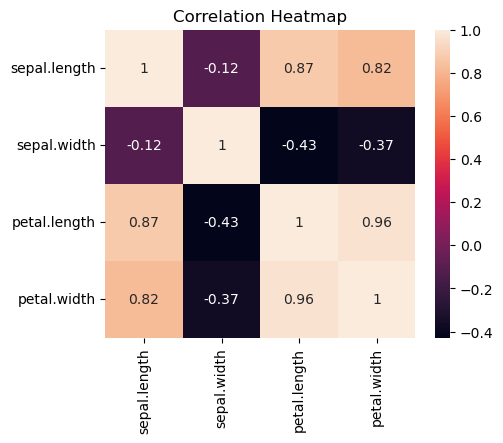

In [17]:
# EDA Heatmap

fid, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)
plt.title('Correlation Heatmap')
plt.show()

## Correlation Matrix - Analysis

In this correlation matrix, black color represent negative correlation and skin light color represents higher correlation. Petal
length against petal width has the highest correlation that is 0.96.

## Label Encoding

In [18]:
le = LabelEncoder()

df['variety'] = le.fit_transform(df['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df['variety']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

# Train, Test and Validation split (60, 20, 20)

In [20]:
features = df.drop(columns=['variety'])
labels = df['variety']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

## Logistic Regression

In [21]:
def model_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [22]:
# Logistics Regression

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

model_results(cv)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1}

0.622 (+/-0.333) for {'C': 0.001}
0.833 (+/-0.199) for {'C': 0.01}
0.911 (+/-0.166) for {'C': 0.1}
0.944 (+/-0.172) for {'C': 1}
0.944 (+/-0.122) for {'C': 10}
0.944 (+/-0.172) for {'C': 100}
0.944 (+/-0.172) for {'C': 1000}


C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [23]:
LR_models = cv.best_estimator_
print(cv.best_estimator_)

LogisticRegression(C=1)


In [24]:
# Validation Accuracy

pred = LR_models.predict(X_val)
accuracy = LR_models.score(X_val, y_val)
print('LR Validation Accuracy: {}'.format(accuracy))

pred == y_val.values.ravel()

LR Validation Accuracy: 1.0


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [25]:
# Test Accuracy

pred = LR_models.predict(X_test)
accuracy = LR_models.score(X_test, y_test)
print('LR Test Accuracy: {}'.format(accuracy))

pred == y_test.values.ravel()

LR Test Accuracy: 1.0


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [26]:
joblib.dump(LR_models, 'LR60_model.pkl')

['LR60_model.pkl']

## Support Vector Machines

In [27]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

model_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.922 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.218) for {'C': 0.1, 'kernel': 'rbf'}
0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [28]:
SVM_models = cv.best_estimator_

In [29]:
# Validation Accuracy 

pred = SVM_models.predict(X_val)
accuracy = SVM_models.score(X_val, y_val)
print('SVM Validation Accuracy: {}'.format(accuracy))

pred == y_val.values.ravel()

SVM Validation Accuracy: 1.0


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [30]:
# Test Accuracy

pred = SVM_models.predict(X_test)
accuracy = SVM_models.score(X_test, y_test)
print ('SVM Test Accuracy : {}'.format(accuracy))

pred == y_test.values.ravel()

SVM Test Accuracy : 1.0


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [31]:
joblib.dump(SVM_models, 'SVM60_model.pkl')

['SVM60_model.pkl']

## Gradient Boosting 

In [32]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

model_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.6 (+/-0.452) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.933 (+/-0.215) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.922 (+/-0.206) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.711 (+/-0.247) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.722 (+/-0.29) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.911 (+/-0.194) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.9 (+/-0.178) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.911 (+/-0.194) for {'learning_rate': 0.

In [33]:
GB_models = cv.best_estimator_

In [34]:
# Validation Accuracy

pred = GB_models.predict(X_val)
accuracy = GB_models.score(X_val, y_val)
print ('Gradient Boosting Validation Accuracy : {}'.format(accuracy))

pred == y_val.values.ravel()

Gradient Boosting Validation Accuracy : 0.9666666666666667


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True])

In [35]:
# Test Accuracy

pred = GB_models.predict(X_test)
accuracy = GB_models.score(X_test, y_test)
print ('Gradient Boosting Test Accuracy : {}'.format(accuracy))

pred == y_test.values.ravel()

Gradient Boosting Test Accuracy : 1.0


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [36]:
joblib.dump(GB_models, 'GB60_model.pkl')

['GB60_model.pkl']

# Train, Test and Validation split (80, 10, 10)

In [37]:
features = df.drop(columns=['variety'])
labels = df['variety']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

## Logistic Regression

In [38]:
# Logistics Regression

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

model_results(cv)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 10}

0.683 (+/-0.041) for {'C': 0.001}
0.833 (+/-0.053) for {'C': 0.01}
0.933 (+/-0.113) for {'C': 0.1}
0.967 (+/-0.062) for {'C': 1}
0.967 (+/-0.062) for {'C': 10}
0.967 (+/-0.062) for {'C': 100}
0.95 (+/-0.097) for {'C': 1000}


C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [39]:
LR_models = cv.best_estimator_

In [40]:
# Validation Accuracy

pred = LR_models.predict(X_val)
accuracy = LR_models.score(X_val, y_val)
print('LR Validation Accuracy: {}'.format(accuracy))

pred == y_val.values.ravel()

LR Validation Accuracy: 0.9333333333333333


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [41]:
# Test Accuracy

pred = LR_models.predict(X_test)
accuracy = LR_models.score(X_test, y_test)
print('LR Test Accuracy: {}'.format(accuracy))

pred == y_test.values.ravel()

LR Test Accuracy: 0.9333333333333333


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [42]:
joblib.dump(LR_models, 'LR80_model.pkl')

['LR80_model.pkl']

## Support Vector Machines

In [43]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

model_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.95 (+/-0.097) for {'C': 0.1, 'kernel': 'linear'}
0.892 (+/-0.085) for {'C': 0.1, 'kernel': 'rbf'}
0.975 (+/-0.041) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.097) for {'C': 1, 'kernel': 'rbf'}
0.975 (+/-0.041) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.041) for {'C': 10, 'kernel': 'rbf'}


In [44]:
SVM_models = cv.best_estimator_

In [45]:
# Validation Accuracy

pred = SVM_models.predict(X_val)
accuracy = SVM_models.score(X_val, y_val)
print('SVM Validation Accuracy: {}'.format(accuracy))

pred == y_val.values.ravel()

SVM Validation Accuracy: 1.0


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [46]:
# Test Accuracy

pred = SVM_models.predict(X_test)
accuracy = SVM_models.score(X_test, y_test)
print('SVM Test Accuracy: {}'.format(accuracy))

pred == y_test.values.ravel()

SVM Test Accuracy: 0.9333333333333333


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [47]:
joblib.dump(SVM_models, 'SVM80_model.pkl')

['SVM80_model.pkl']

## Gradient Boosting

In [48]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

model_results(cv)

BEST PARAMS: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 50}

0.467 (+/-0.266) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.942 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.967 (+/-0.062) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.95 (+/-0.062) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.783 (+/-0.464) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.95 (+/-0.062) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.942 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.933 (+/-0.085) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.8 (+/-0.47) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.933 (+/-0.085) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.942 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.933 (+/-0.085) for {'learning_rate': 0.

In [49]:
GB_models = cv.best_estimator_

In [50]:
# Validation Accuracy

pred = GB_models.predict(X_val)
accuracy = GB_models.score(X_val, y_val)
print('Gradient Boosting Validation Accuracy: {}'.format(accuracy))

pred == y_val.values.ravel()

Gradient Boosting Validation Accuracy: 0.9333333333333333


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [51]:
# Test Accuracy

pred = GB_models.predict(X_test)
accuracy = GB_models.score(X_test, y_test)
print('Gradient Boosting Test Accuracy: {}'.format(accuracy))

pred == y_test.values.ravel()

Gradient Boosting Test Accuracy: 0.9333333333333333


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [52]:
joblib.dump(GB_models, 'GB80_model.pkl')

['GB80_model.pkl']

## Comparing Performance of the models

In [53]:
models = {}

for mdl in ['LR60', 'SVM60', 'GB60', 'LR80', 'SVM80', 'GB80']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [54]:
models

{'LR60': LogisticRegression(C=1),
 'SVM60': SVC(C=1, kernel='linear'),
 'GB60': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250),
 'LR80': LogisticRegression(C=10),
 'SVM80': SVC(C=1, kernel='linear'),
 'GB80': GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=50)}

In [55]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='micro'), 3)
    recall = round(recall_score(labels, pred, average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [56]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR60 -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.933 / Latency: 1.0ms
SVM60 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
GB60 -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.933 / Latency: 2.0ms
LR80 -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.933 / Latency: 2.4ms
SVM80 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
GB80 -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.933 / Latency: 2.0ms


## Performance Analysis on Validation Set

Based on the performance metrics, following are the analysis:

Accuracy: 
    
Both split ratios provide relatively high accuracy for all the 3 models, ranging from 0.933 to 1.00. SVM outperforms the logistic and Gradient Boosting, with the 60-20-20 split ratio recording the best accuracy (1.0) against the test data.
    
Precision: 
    
The precision values for the various models and split ratios vary from 0.933 to 1.00, indicating successful positive sample 
identification. Due to its exceptional precision (1.00) in 60:20:20 ratios, SVM stands out. As a result, SVM predictions are 
extremely reliable.

Recall:
    
Similar to the recall values, which range from 0.933 to 1.00, the recall values are also high. SVM exhibits remarkable 
performance with a recall of exactly one (1.00) in both split ratios. It follows from this that SVM can accurately identify all 
positive samples, reducing the likelihood of false negatives.


Latency: 
The latency figures indicate the amount of time each model took to process. Logistic Regression with holds the highest latency of (2.4ms) on 80:10:10 split ratio, followed by Gradient Boosting with latency (2.0ms) on both the split ratios. SVM model for 
both split ratios hold (1.0ms). 

In [57]:
evaluate_model('SVM on Train-Test Split(60,20,20)', models['SVM60'], X_test, y_test)

SVM on Train-Test Split(60,20,20) -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.6ms


In [58]:
evaluate_model('SVM Train-Test Split (80,10,10)', models['SVM80'], X_test, y_test)

SVM Train-Test Split (80,10,10) -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.933 / Latency: 1.0ms


## Performance Analysis on Test Set

The optimum model and split ratio, while taking into account overall performance, depending on the particular evaluation 
criteria that are most significant to you. SVM regularly works well with impeccable accuracy, precision, and recall, according 
to the data supplied. The 80:10:10 split ratio is chosen if lower latency is a key consideration because it has a 1.0ms delay 
for every model, where as 60:20:20 if accuracy, precision, and recall are the primary concern.